<a href="https://colab.research.google.com/github/ph7klw76/SIF3008/blob/main/Copy_of_Kronig%E2%80%93Penney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 62.2 MB/s eta 0:00:00


In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import numpy as np

# Constants for the equations
m = 9.10938356e-31   # mass
h_bar = 1.0545718e-34  # reduced Planck's constant
k = 5*1e-9  # wave number (arbitrary, can be adjusted)

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='graph'),
    html.Label('V'),
    dcc.Slider(id='V-slider', min=0.1, max=100, step=0.1, value=25),
    html.Label('ao'),
    dcc.Slider(id='ao-slider', min=1, max=10, step=0.1, value=5),
    html.Label('bo'),
    dcc.Slider(id='bo-slider', min=1, max=10, step=0.1, value=5),
])

@app.callback(
    Output('graph', 'figure'),
    [Input('V-slider', 'value'),
     Input('ao-slider', 'value'),
     Input('bo-slider', 'value')]
)
def update_figure(V, ao, bo):
    V0 =  V*1.602176634e-19   # potential energy
    b = ao*1e-10  # width of the potential well (arbitrary, can be adjusted)
    a = bo*1e-10
    alpha_d = np.linspace(0.1, 20, 400)
    P = m * V0 * a*b / h_bar**2
    y1 = P*(np.sin(alpha_d)/(alpha_d)) + np.cos(alpha_d)
    y2 = np.cos(0* alpha_d)
    y3 = -1*np.cos(0* alpha_d)

    return {
        'data': [
            go.Scatter(x=alpha_d, y=y1, mode='lines', name='P*sin(αd)/(αd + cos(αd))'),
            go.Scatter(x=alpha_d, y=y2, mode='lines', name='cos(kd)', line=dict(dash='dash')),
            go.Scatter(x=alpha_d, y=y3, mode='lines', name='-cos(kd)', line=dict(dash='dash'))
        ],
        'layout': go.Layout(
            xaxis={'title': 'αd'},
            yaxis={'title': 'Function values'},
            title={
                'text': f'Plot of Functions (V0={V0:.3e}, a={a:.3e}, b={b:.3e})',
                'x':0.5,
                'xanchor': 'center'
            }
        )
    }

if __name__ == '__main__':
  app.run_server(debug=True, port=8051)

<ipython-input-2-61df00aef97b>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-2-61df00aef97b>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<IPython.core.display.Javascript object>

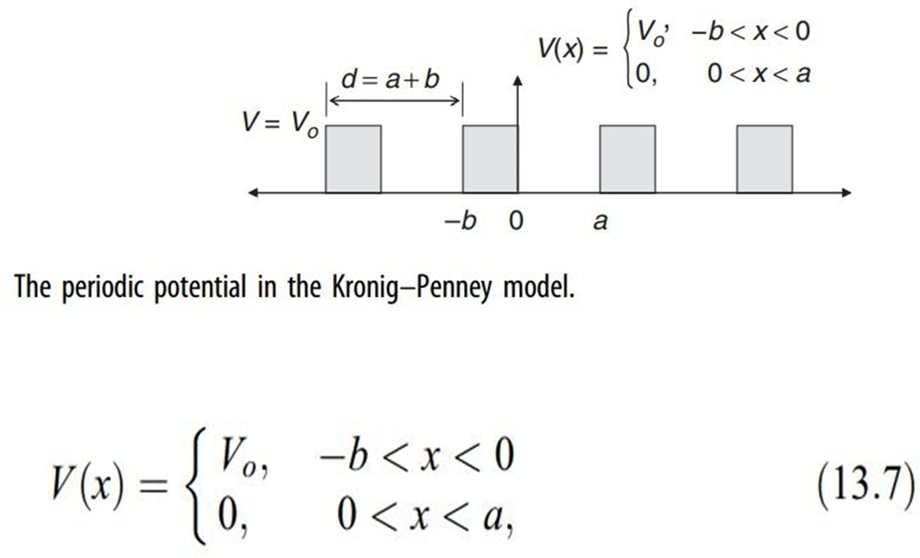